In [1]:
from collections import defaultdict
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import os


In [3]:
def create_pssm_transposed(aligned_sequences):
    # Initialize a dictionary to hold counts for each amino acid at each position.
    position_counts = defaultdict(lambda: defaultdict(int))
    sequence_length = len(aligned_sequences[0])
    num_sequences = len(aligned_sequences)

    # Count the occurrences of each amino acid at each position.
    for seq in aligned_sequences:
        for position, amino_acid in enumerate(seq):
            position_counts[position][amino_acid] += 1

    # Convert counts to frequencies.
    pssm = defaultdict(dict)
    for position in position_counts:
        for amino_acid in position_counts[position]:
            pssm[position][amino_acid] = position_counts[position][amino_acid] / num_sequences

    # Convert the PSSM to a DataFrame for better visualization.
    pssm_df = pd.DataFrame(pssm).fillna(0)  # Fill missing values with 0.
    pssm_df_transposed = pssm_df.transpose()
    return pssm_df_transposed

In [4]:
def process_aligned_sequences(file_path):
    aligned_sequences = []

    # Open and read the FASTA file
    with open(file_path, 'r') as file:
        fasta_data = file.read()

    # Split the file content into individual sequences based on '>'
    fasta_entries = fasta_data.split('>')[1:]  # Skip the first empty entry if file starts with '>'

    for entry in fasta_entries:
        # Split each entry into lines and discard the first line (header)
        sequence_lines = entry.split('\n', 1)[1]
        # Combine the lines back into a single sequence string
        sequence = sequence_lines.replace('\n', '')
        aligned_sequences.append(sequence)

    return aligned_sequences

In [5]:
# Create PSSM
subfolder = 'aligned_nuclear_proteins_sequences'
pssm_list = []
for i in range(10):
    file_path = os.path.join(subfolder, f'aligned_nuclear_protein_sequences_{i}.txt')
    aligned_sequences = process_aligned_sequences(file_path)
    pssm_df = create_pssm_transposed(aligned_sequences)
    pssm_df.drop('-', axis=1, inplace=True)
    pssm_list.append(pssm_df)

In [6]:
pssm_list[0].columns

Index(['M', 'S', 'V', 'A', 'N', 'D', 'E', 'Y', 'L', 'K', 'I', 'F', 'Q', 'H',
       'G', 'P', 'T', 'R', 'W', 'C', 'X'],
      dtype='object')

In [8]:
subfolder = 'PSSM'

if not os.path.exists(subfolder):
    os.makedirs(subfolder)

for i, pssm in enumerate(pssm_list):
    file_path = os.path.join(subfolder, f'pssm_{i}.csv')
    pssm.to_csv(file_path,index=False)

In [15]:
# Plot customized heatmap
def plot_heatmap(pssm, width=10, height=30):
    plt.figure(figsize=(width, height))
    ax = sns.heatmap(pssm, annot=False, cmap='viridis', linewidths=.5,
                    xticklabels=pssm.columns)


    ax.xaxis.tick_top()

    ax.set_xticklabels(pssm.columns, ha="left")
    plt.tick_params(axis='x', which='both', bottom=True, top=True, labelbottom=True, labeltop=True)

    ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

    # Title and labels
    plt.title('PSSM Heatmap', y=1.05)
    plt.xlabel('Amino Acids', labelpad=20)
    plt.ylabel('Position')

    plt.tight_layout()

    plt.show()

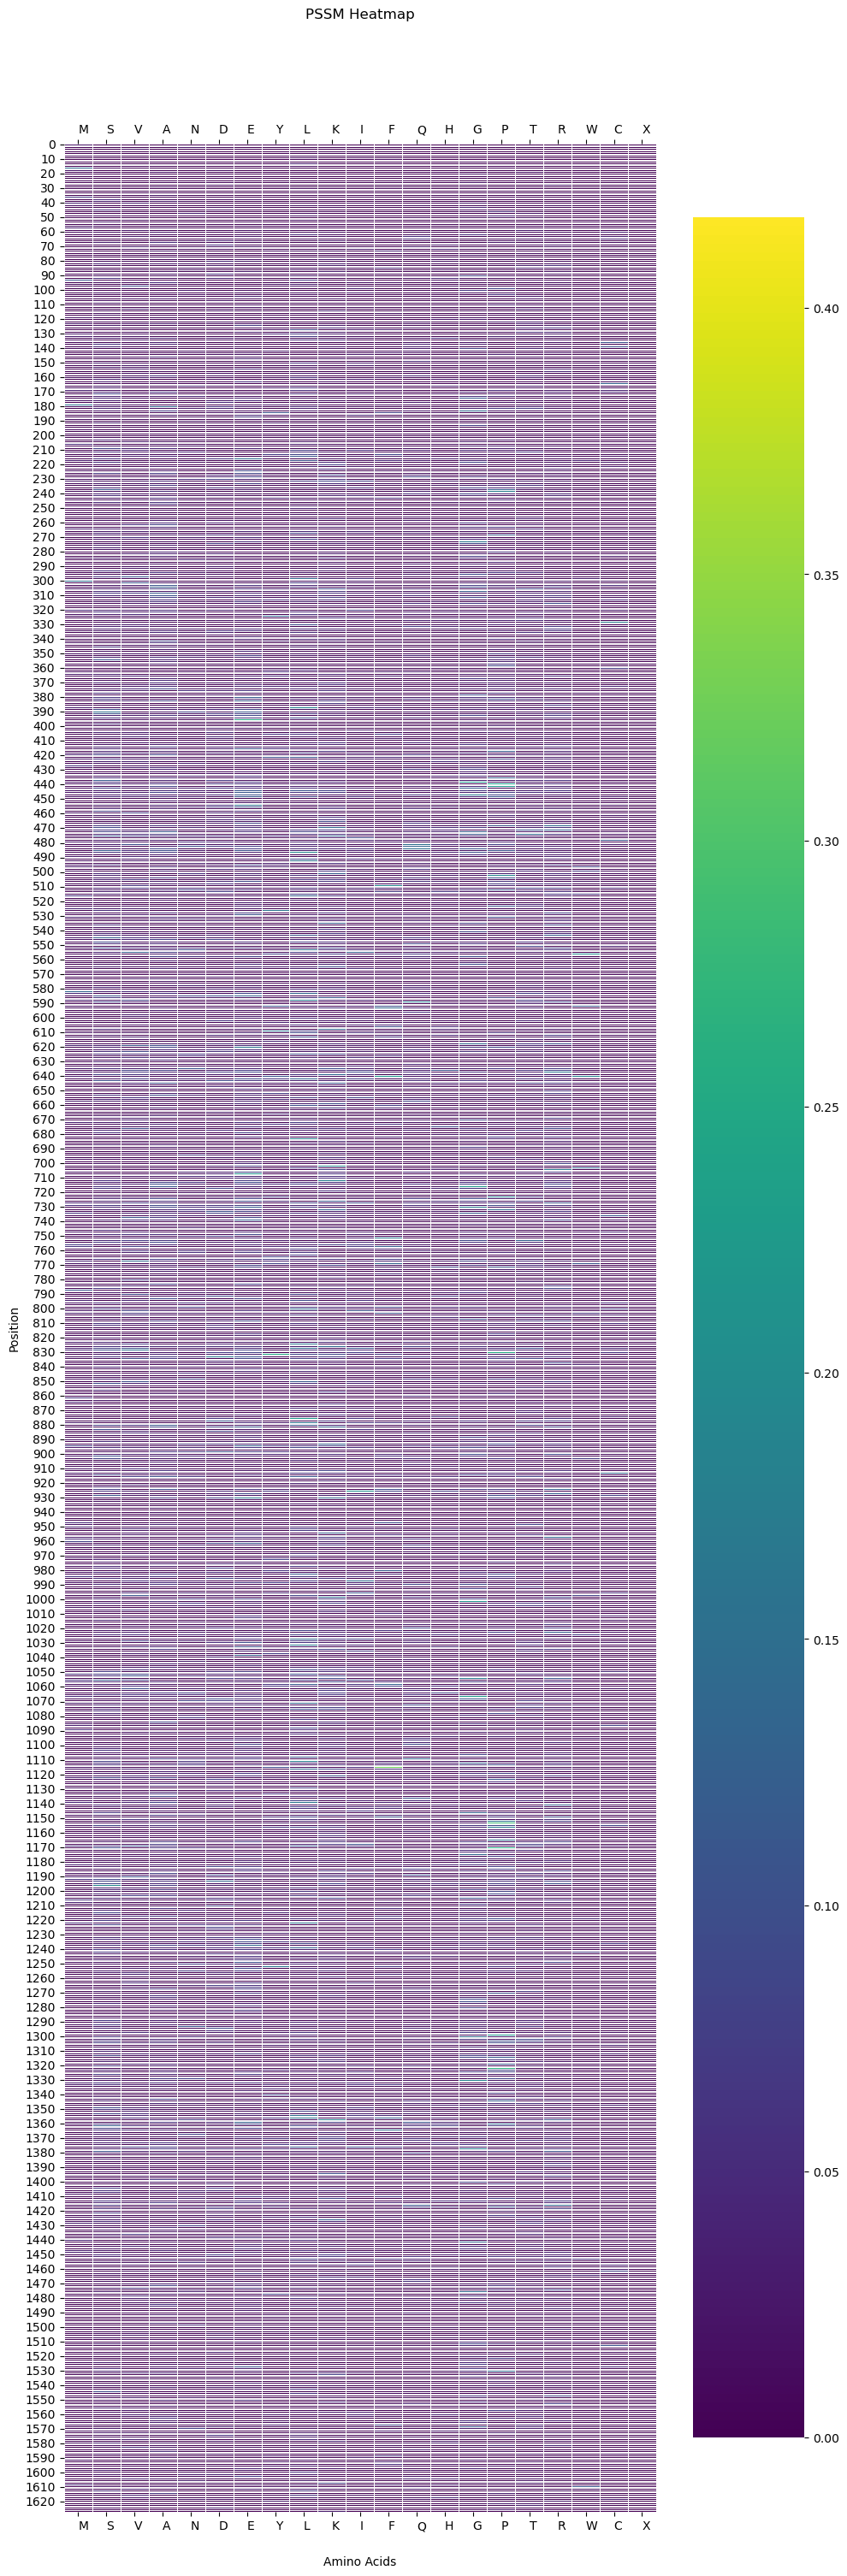

In [16]:
plot_heatmap(pssm_list[0],10,30)

In [30]:

# Convert DataFrame to Numpy Array
matrix = pssm_df_transposed.values

# Perform SVD
U, S, VT = np.linalg.svd(matrix, full_matrices=False)  # full_matrices=False for reduced form

In [32]:
print(U)
print()
print(S)
print()
print(VT)

[[0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]]

[1.         1.         1.         0.79056942 0.79056942]

[[-0.         -0.          0.          1.         -0.          0.
   0.        ]
 [ 1.          0.          0.          0.          0.          0.
   0.        ]
 [-0.         -0.         -0.          0.          1.          0.
   0.        ]
 [-0.         -0.         -0.         -0.          0.          0.9486833
   0.31622777]
 [-0.          0.9486833   0.31622777 -0.         -0.          0.
   0.        ]]
